In [3]:
import pandas as pd
df = pd.read_csv('split_part2_shridarshan_clean.csv')
df.head()


,question_id,title,body,tags,accepted_answer_id,accepted_answer_body,link,tag,creation_date,view_count,score,answer_count,is_answered,last_activity_date,last_edit_date
0,36629329,how do i keep intra-word periods in unigrams? ...,i would like to preserve two letter acronyms i...,"['r', 'nlp', 'n-gram', 'quanteda']",36631672,the reason for this behaviour is that quanteda...,https://stackoverflow.com/questions/36629329,r,14-04-2016 16:53,311.0,1.0,1.0,True,19-10-2022 08:00,14-04-2016 18:56
1,70282594,text classification from html with beautifulsoup,i have obtained html page source code and then...,"['python', 'html', 'beautifulsoup', 'href', 't...",70283012,"according to your question, i use split() meth...",https://stackoverflow.com/questions/70282594,python,08-12-2021 22:39,389.0,1.0,1.0,True,08-12-2021 23:34,08-12-2021 23:14
2,77922817,importerror: cannot import name &#39;iterator&...,when i try to install openai on my google cola...,"['python', 'python-3.x', 'pip', 'openai-api']",77922914,i found a related issue on openai forum:\n\nso...,https://stackoverflow.com/questions/77922817,python,01-02-2024 19:18,8586.0,2.0,1.0,True,13-02-2024 10:18,13-02-2024 10:18
3,73744658,resource punkt not found. please use the nltk ...,i have nltk installed and it is giving me an e...,"['python', 'nltk']",74060135,adding these code will resolve your issue:\nnl...,https://stackoverflow.com/questions/73744658,python,16-09-2022 12:10,56427.0,17.0,7.0,True,11-01-2025 03:08,11-01-2025 03:00
4,71720038,runtimeerror: boolean value of tensor with mor...,"i'm facing the following error, and i don't kn...","['python', 'pytorch', 'bert-language-model']",71732394,your tensor remain (in your dataset class) is ...,https://stackoverflow.com/questions/71720038,python,02-04-2022 18:14,3697.0,0.0,1.0,True,04-04-2022 05:24,04-04-2022 05:12


In [13]:
def improved_categorize_post(title, answer):
    combined = f"{str(title)} {str(answer)}".lower()

    if any(task in combined for task in [
        "tokenize", "tokenization", "remove punctuation", "clean text", 
        "stopword", "stemming", "lemmatization", "normalize", "preprocess"
    ]):
        return "Text Preprocessing Task"
    
    elif any(task in combined for task in [
        "train", "fit model", "loss function", "accuracy", "overfit", 
        "underfit", "epoch", "split data", "model training"
    ]):
        return "Model Training Issue"
    
    elif any(task in combined for task in [
        "language identification", "detect language", "text language"
    ]):
        return "Language Detection"
    
    elif any(task in combined for task in [
        "sentiment", "opinion mining", "positive sentiment", "negative sentiment"
    ]):
        return "Sentiment Analysis"

    elif any(task in combined for task in [
        "summarization", "similarity", "text classification", "entity recognition",
        "ner", "named entity", "translation", "clustering"
    ]):
        return "NLP Task Query"

    elif any(tool in combined for tool in [
        "spacy", "nltk", "transformers", "huggingface", 
        "gensim", "word2vec", "fasttext", "lda", "bert", "gpt", "llm"
    ]):
        return "Tool/Library Usage"
    
    elif any(phrase in combined for phrase in [
        "how to", "how do i", "how can", "unable to", 
        "not working", "get error", "error while", "cannot", "exception", "fix this"
    ]):
        return "Implementation Issue"
    
    elif any(phrase in combined for phrase in [
        "what is", "explain", "difference between", 
        "compare", "meaning of", "definition of"
    ]):
        return "Conceptual Understanding"
    
    else:
        return "Uncategorized"



In [15]:
df['sentence_level_category'] = df.apply(lambda row: categorize_post_sentence_level(row['title'], row['accepted_answer_body']), axis=1)
df[['title', 'sentence_level_category']].head()


,title,sentence_level_category
0,how do i keep intra-word periods in unigrams? ...,Implementation Issue
1,text classification from html with beautifulsoup,Uncategorized
2,importerror: cannot import name &#39;iterator&...,Uncategorized
3,resource punkt not found. please use the nltk ...,Tool Usage
4,runtimeerror: boolean value of tensor with mor...,Uncategorized


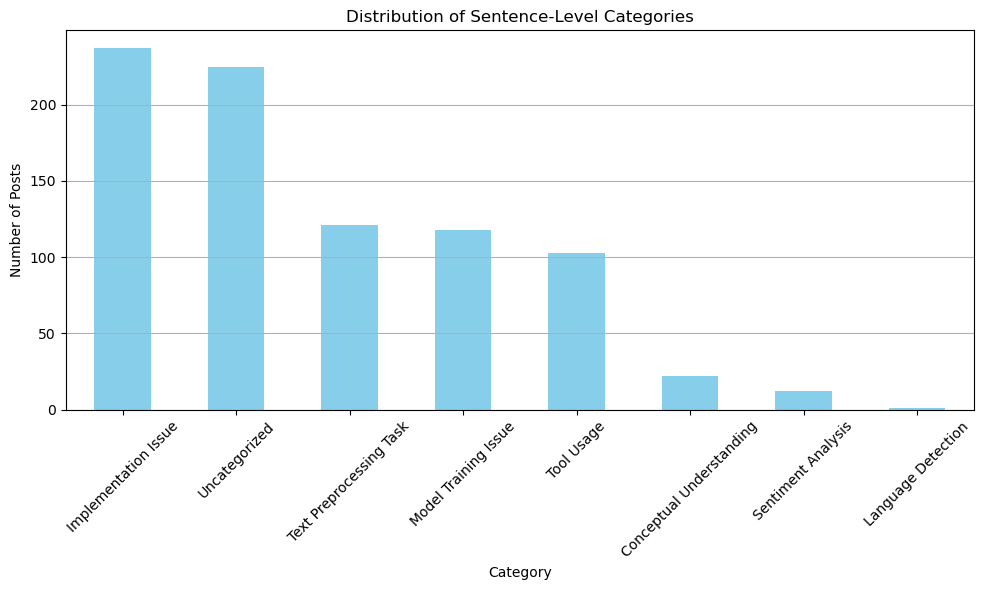

In [17]:
import matplotlib.pyplot as plt

category_counts = df['sentence_level_category'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentence-Level Categories')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()


In [19]:

df[['title', 'sentence_level_category']].to_csv('sentence_level_output.csv', index=False)
